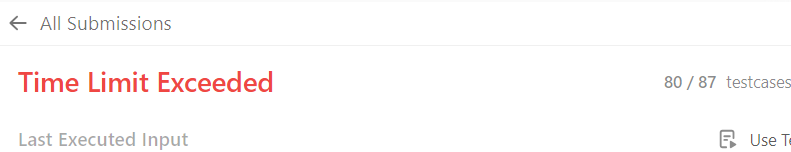

In [ ]:
class Solution:
    def maxEnvelopes(self, envelopes: List[List[int]]) -> int:
        envelopes.sort(key = lambda x:x[0])
        dp = [[-1 for _ in range(len(envelopes))] for _ in range(len(envelopes))]
        return self.helper(dp, envelopes, 0, -1)

    def helper(self, dp, envs, idx, prev):
        if idx == len(envs):
            return 0
        
        c1, c2 = 0, 0
        if dp[idx][prev] == -1:
            if prev == -1 or envs[idx][0] > envs[prev][0] and envs[idx][1] > envs[prev][1]:
                c1 = 1 + self.helper(dp, envs, idx + 1, idx)
                c2 = self.helper(dp, envs, idx + 1, prev)

            c3 = self.helper(dp, envs, idx + 1, prev)
            dp[idx][prev] = max(c3, max(c1, c2))
        return dp[idx][prev]

## TLE

In [2]:
from typing import List
class Solution:
    def maxEnvelopes(self, envelopes: List[List[int]]) -> int:
        envelopes.sort(key = lambda x:x[1])
        # print(envelopes)
        n  = len(envelopes)
        dp = [1]*len(envelopes)
        maxlength  = 1


        for i in range(n):
            for j in range(i):
                if envelopes[i][0] > envelopes[j][0]  and envelopes[i][1] >envelopes[j][1] and dp[i] <=dp[j]:
                    dp[i] = dp[j] + 1
                    maxlength = max(maxlength, dp[i])
        return maxlength

# Using Binary Search
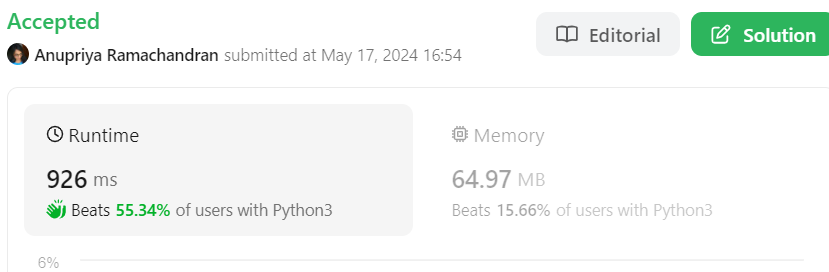

In [2]:
from typing import List
class Solution:
    def maxEnvelopes(self, envelopes: List[List[int]]) -> int:
        envelopes.sort(key = lambda x: (x[0], -x[1]))
        
        n = len(envelopes)
        dp = []
        
        for w, h in envelopes:
            index = bisect_left(dp, h)
            if index >= len(dp):
                dp.append(h)
            else:
                dp[index] = h

        return len(dp)